In [1]:
# Lodz University of Technology
# 2022-23 Image Processing Assignment 2
# @Ahmet Galip Sengun - 904261
# October 2022

In [2]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

# Task 1

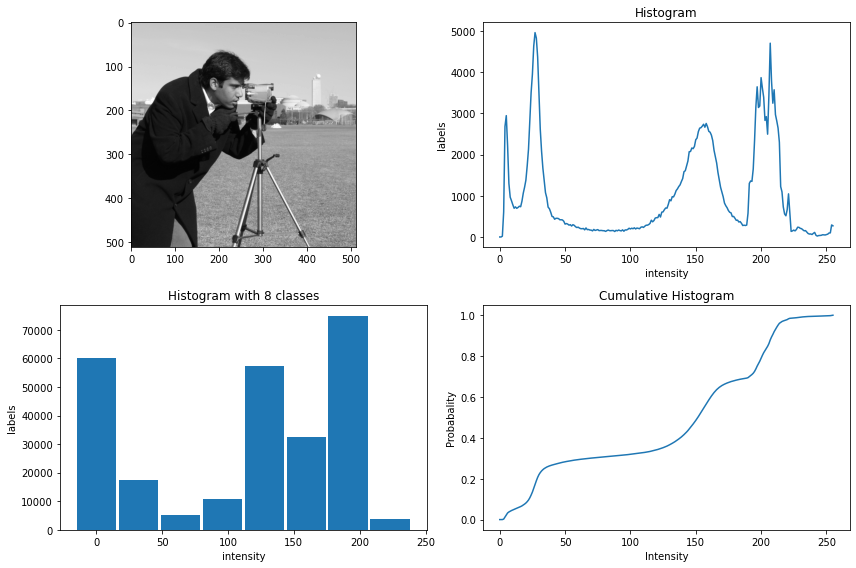

In [3]:
# Load image
img = skimage.data.camera()

# Create subplot
fig, ax = plt.subplots(2, 2, figsize = (12,8))

# Plot image
ax[0, 0].imshow(img, cmap="gray")

# Bar Plot
bar1, bar2 = np.histogram(img, bins= 8)
ax[1, 0].bar(bar2[:-1], bar1, width=30)
ax[1, 0].set_title("Histogram with 8 classes")
ax[1, 0].set_xlabel('intensity')
ax[1, 0].set_ylabel('labels')

# Line Plot
values, pixels = np.histogram(img, bins=range(0,257))
ax[0, 1].plot(pixels[:-1], values)
ax[0, 1].set_title("Histogram")
ax[0, 1].set_xlabel('intensity')
ax[0, 1].set_ylabel('labels')

# Cumulative Hist
values, pixels = np.histogram(img, bins=range(0,257))
prob = values / sum(values)
cumulative = np.cumsum(prob)
ax[1, 1].plot(pixels[:-1], cumulative)
ax[1, 1].set_title("Cumulative Histogram")
ax[1, 1].set_xlabel('Intensity')
ax[1, 1].set_ylabel('Probabality')

fig.tight_layout()
plt.show()

# Task 2

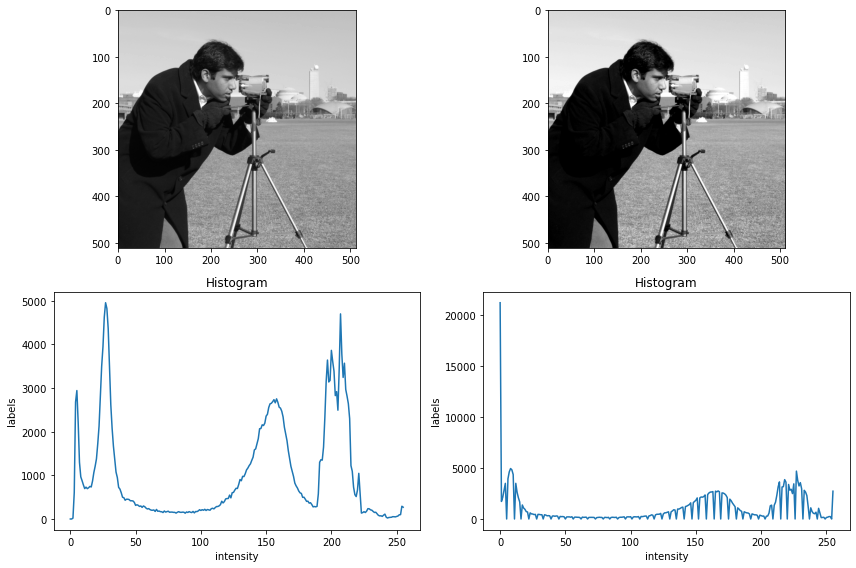

In [4]:
# Create subplot
fig, ax = plt.subplots(2, 2, figsize = (12,8))

# Plot image
ax[0, 0].imshow(img, cmap="gray")

# Line Plot
values, pixels = np.histogram(img, bins=range(0,257))
ax[1, 0].plot(pixels[:-1], values)
ax[1, 0].set_title("Histogram")
ax[1, 0].set_xlabel('intensity')
ax[1, 0].set_ylabel('labels')

# rescale Plot
rescaled=skimage.exposure.rescale_intensity(img,(20,230))
ax[0, 1].imshow(rescaled, cmap="gray")

# Hist
values, pixels = np.histogram(rescaled, bins=range(0,257))
ax[1, 1].plot(pixels[:-1], values)
ax[1, 1].set_title("Histogram")
ax[1, 1].set_xlabel('intensity')
ax[1, 1].set_ylabel('labels')

fig.tight_layout()
plt.show()

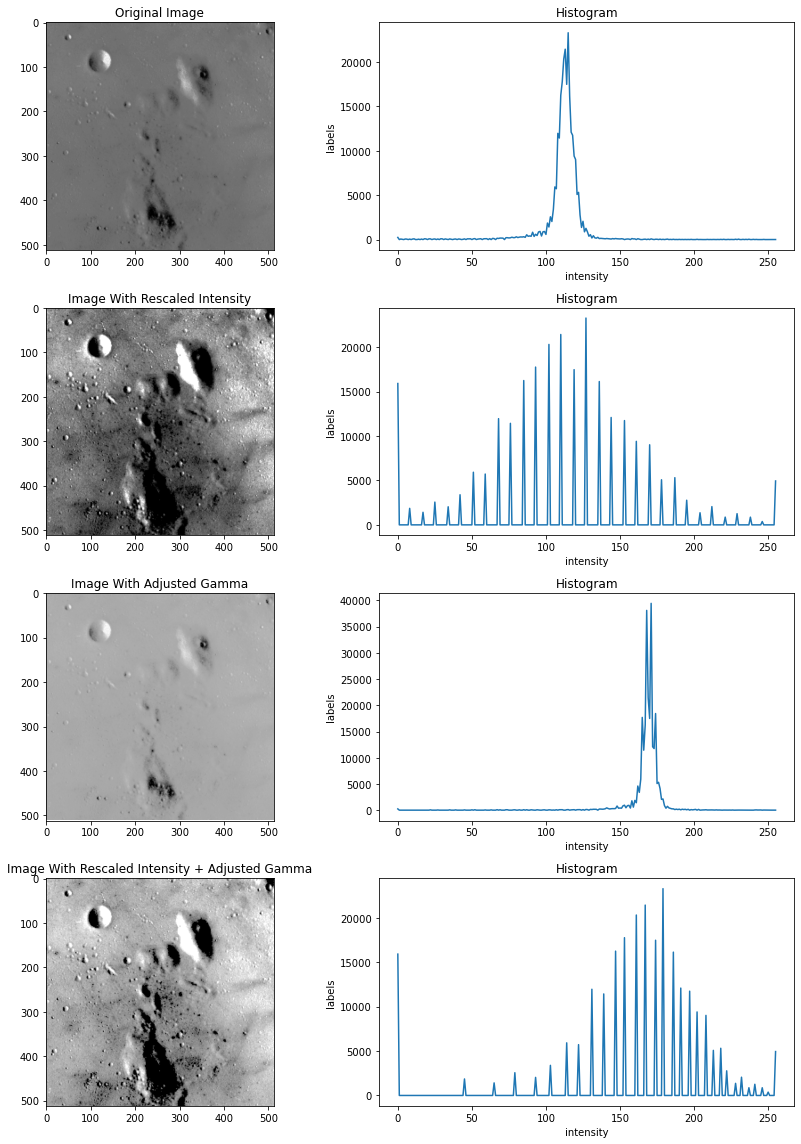

In [64]:
from skimage import exposure

dark_image = skimage.data.moon()

# Create subplot
fig, ax = plt.subplots(4, 2, figsize = (12,16))

# Plot image
ax[0, 0].imshow(dark_image, cmap="gray")
ax[0, 0].set_title("Original Image")


# Line Plot
values, pixels = np.histogram(dark_image, bins=range(0,257))
ax[0, 1].plot(pixels[:-1], values)
ax[0, 1].set_title("Histogram")
ax[0, 1].set_xlabel('intensity')
ax[0, 1].set_ylabel('labels')


# rescale Plot
rescaled=skimage.exposure.rescale_intensity(dark_image,(100,130))
ax[1, 0].imshow(rescaled, cmap="gray")
ax[1, 0].set_title("Image With Rescaled Intensity")


# lline Hist
values, pixels = np.histogram(rescaled, bins=range(0,257))
ax[1, 1].plot(pixels[:-1], values)
ax[1, 1].set_title("Histogram")
ax[1, 1].set_xlabel('intensity')
ax[1, 1].set_ylabel('labels')

# Gamma correction
gamma_corrected = exposure.adjust_gamma(dark_image, 0.5)
ax[2, 0].imshow(gamma_corrected, cmap="gray")
ax[2, 0].set_title("Image With Adjusted Gamma")

# 
values, pixels = np.histogram(gamma_corrected, bins=range(0,257))
ax[2, 1].plot(pixels[:-1], values)
ax[2, 1].set_title("Histogram")
ax[2, 1].set_xlabel('intensity')
ax[2, 1].set_ylabel('labels')

gamma_corrected = exposure.adjust_gamma(rescaled, 0.5)
ax[3, 0].imshow(gamma_corrected, cmap="gray")
ax[3, 0].set_title("Image With Rescaled Intensity + Adjusted Gamma")


values, pixels = np.histogram(gamma_corrected, bins=range(0,257))
ax[3, 1].plot(pixels[:-1], values)
ax[3, 1].set_title("Histogram")
ax[3, 1].set_xlabel('intensity')
ax[3, 1].set_ylabel('labels')


fig.tight_layout()
plt.show()

# Task 3

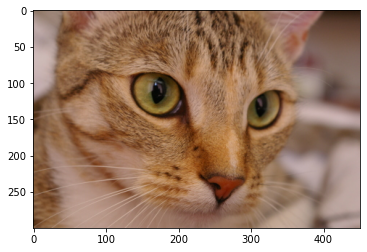

In [6]:
img2 = skimage.data.chelsea()
plt.imshow(img2)

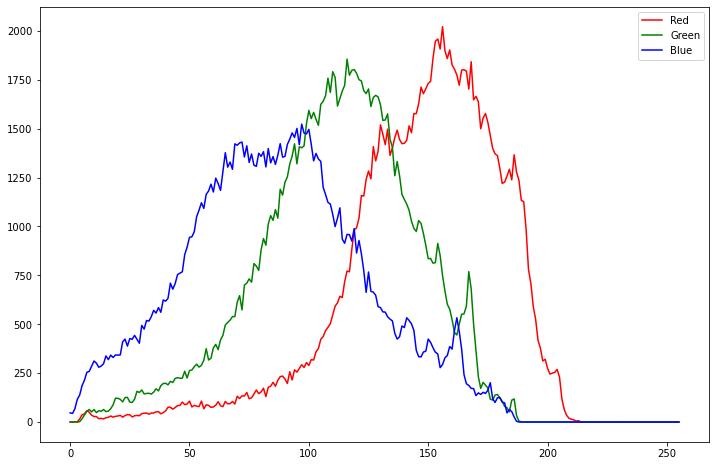

In [7]:
plt.figure(figsize=(12,8))

R_values, R_pixels = np.histogram(img2[:,:,0], bins=range(0,257))
G_values, G_pixels = np.histogram(img2[:,:,1], bins=range(0,257))
B_values, B_pixels = np.histogram(img2[:,:,2], bins=range(0,257))

plt.plot(R_pixels[:-1], R_values, label= "Red", color = "red")
plt.plot(G_pixels[:-1], G_values, label= "Green", color = "green")
plt.plot(B_pixels[:-1], B_values, label= "Blue", color = "blue")

plt.legend()
plt.show()

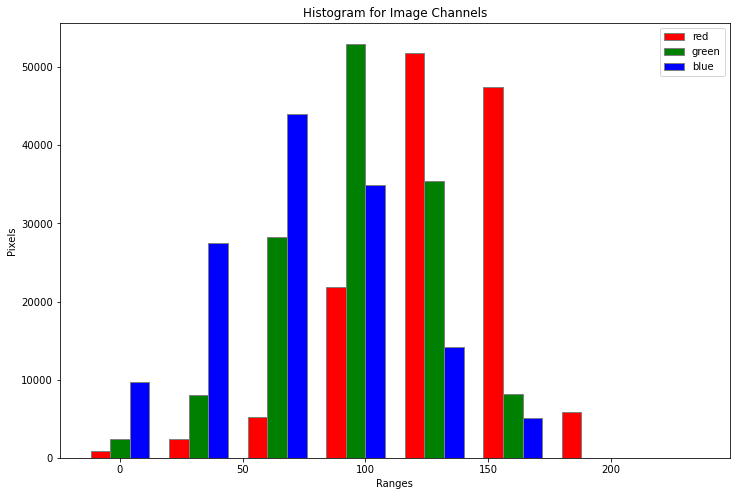

In [8]:
fig = plt.subplots(figsize =(12, 8))
barWidth = 8
width = 8

# Make the plot
R_bar1, R_bar2 = np.histogram(img2[:,:,0], bins = range(0,257,32))
G_bar1, G_bar2 = np.histogram(img2[:,:,1], bins = range(0,257,32))
B_bar1, B_bar2 = np.histogram(img2[:,:,2], bins = range(0,257,32))

plt.bar(R_bar2[:-1]-width, R_bar1, color ='r', width = barWidth,
        edgecolor ='grey', label ='red')
plt.bar(G_bar2[:-1], G_bar1, color ='g', width = barWidth,
        edgecolor ='grey', label ='green')
plt.bar(B_bar2[:-1]+width, B_bar1, color ='b', width = barWidth,
        edgecolor ='grey', label ='blue')

plt.title("Histogram for Image Channels")
plt.ylabel("Pixels")
plt.xlabel("Ranges")

plt.legend()
plt.show()

# Task 4

In [9]:
def fun (x, a):    
    b = 128 - a*128    
    y = a*x + b
    
    if y < 0: 
        y = 0
    if y > 255: 
        y = 255
        
    return y

In [10]:
a = 1.5
LUT = [fun(x, a) for x in range(256)]

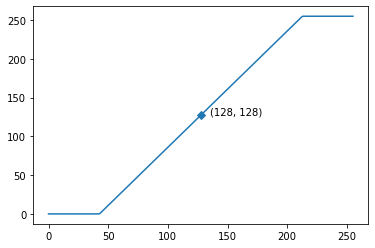

In [11]:
plt.plot(LUT, '-D', markevery=[128])
plt.text(135, 128+0.5, '(128, 128)')
plt.show()

In [12]:
width, height = img.shape
scaled = img.copy()
for i in range(width):
    for j in range(height):
        scaled[i, j] = LUT[img[i, j]]

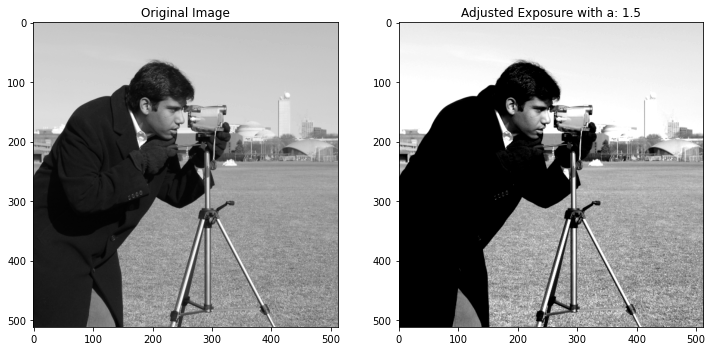

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")


ax[1].imshow(scaled, cmap="gray")
ax[1].set_title(f"Adjusted Exposure with a: {a}")
plt.show()